In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 
import warnings
warnings.filterwarnings('ignore')

## Get dividends

In [2]:
test_lst = ['AHT_div','AV_div','BA_div','GSK_div','HSBA_div','JD_div','NG_div','RDSB_div','RIO_div',
            'SPX_div','TSCO_div','TW_div','ULVR_div']

In [3]:
def get_years(lst, start_int, end_int):
    df = pd.read_excel('/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/dividend/{}.xlsx'.format(lst[0]), skiprows=1)
    df.columns = [''.join(filter(str.isalpha, i)).lower() for i in df.columns]
    df = [int(i[3:]) for i in list(df['yearend'])]
    df = list(filter(lambda i: end_int>=i>=start_int, df))
    return(df)

In [4]:
def get_dividends(lst, start_int, end_int):
    new_list = []
    for i in lst:
        df = pd.read_excel('/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/dividend/{}.xlsx'.format(i), skiprows=1)
        df.columns = [''.join(filter(str.isalpha, i)).lower() for i in df.columns]  #由于有些标题带*号，只保留字符，然后都变小写
        df = df[['yearend','total']]
        df.columns = ['year',i]
        df['year'] = [int(i[3:]) for i in list(df['year'])]
        df = df.loc[(df['year']<=end_int) & (df['year']>=start_int)] 
        df[i] = [float(re.sub("[^\d\.]", "", i)) for i in df[i]] 
        new_list.append(df[i].reset_index(drop=True))
    return(new_list)

#### Dividend from ____year to ____year

In [5]:
div_yrs = get_years(test_lst, 2015, 2020)

In [6]:
divs = get_dividends(test_lst, 2015, 2020)

In [7]:
dividends = pd.DataFrame(np.array(divs).T, columns=test_lst , index=np.array(div_yrs).T)
dividends = dividends.iloc[::-1] #将数据从老到新排列
dividends

,AHT_div,AV_div,BA_div,GSK_div,HSBA_div,JD_div,NG_div,RDSB_div,RIO_div,SPX_div,TSCO_div,TW_div,ULVR_div
2015,15.25,20.8,20.9,80.0,51.0,1.41,42.87,188.0,215.0,69.0,1.16,1.67,120.80
2016,22.50,23.3,21.3,80.0,51.0,1.48,43.34,188.0,170.0,76.0,0.00,2.82,128.04
2017,27.50,27.4,21.8,80.0,51.0,1.55,44.27,188.0,290.0,87.5,0.00,4.74,143.40
2018,33.00,30.0,22.2,80.0,51.0,1.63,45.93,188.0,307.0,100.0,3.00,6.24,154.88
2019,40.00,15.5,23.2,80.0,30.0,1.71,47.34,188.0,382.0,110.0,5.77,3.84,164.16
2020,40.65,21.0,23.7,80.0,15.0,0.28,48.57,65.3,464.0,118.0,9.15,4.14,165.80


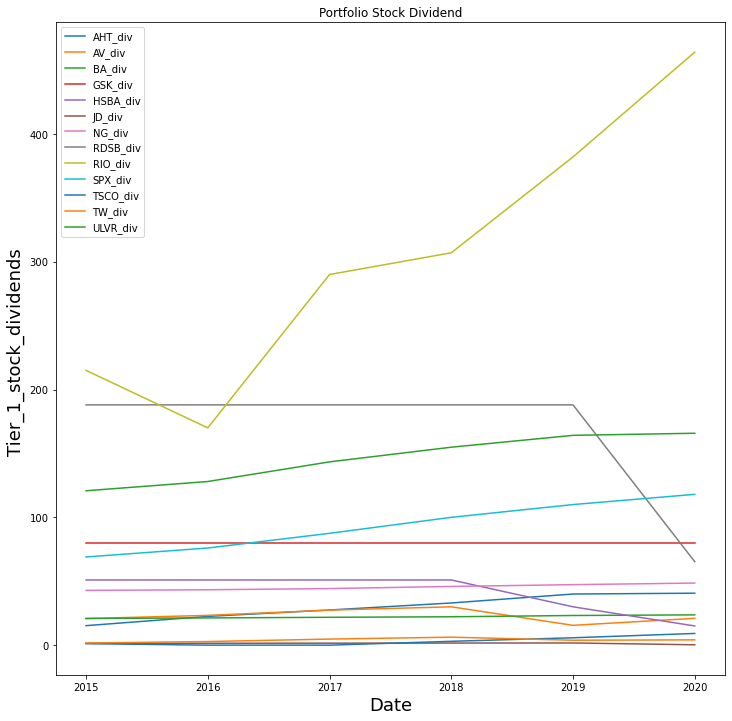

In [8]:
# visually show portfolio
title = 'Portfolio Stock Dividend'

# get the stocks
my_stocks = dividends

# create
plt.figure(figsize=(12,12))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stock_dividends ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

## Get stock prices

In [9]:
stocks = ['AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX', 'TSCO', 'TW', 'ULVR']
# start_date = '2016-01-01'
# end_date = '2021-01-01'

In [10]:
def get_dates(lst, start_str, end_str):
    data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(lst[0]))
    data = data.loc[(data['time']>=start_str)&(data['time']<end_str)]
    date = [datetime.fromisoformat(i[:10]) for i in data['time']]
    return(date)

In [11]:
def get_prices(lst,start_str, end_str):   
    new_list = []
    for i in lst:
        data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(i)) # read data from csv 注意文件夹路径和文件名
        df = data[['time','close']]                                          # get time and close price
        df.columns = ['date', i]                                       # change column names
        df.date = [datetime.fromisoformat(i[:10]) for i in df['date']]       # convert dates into datetime
        df = df.loc[(df['date']>=start_str)&(df['date']<end_str)]    # make sure date start from 2016-01-01
        df = df.reset_index(drop=True)
        new_list.append(df[i])
    return(new_list)

#### price from ____year to ____year

In [12]:
date = get_dates(stocks,'2015-01-01','2020-01-01')
# date.head()

In [13]:
box = get_prices(stocks,'2015-01-01','2020-01-01')
# box.head()

In [14]:
prices = pd.DataFrame(np.array(box).T, columns=stocks , index=np.array(date).T)
prices.head()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-01-02,1165.0,484.39999,469.20001,1383.0,612.00000,101.600000,908.29999,2235.5,2970.0,2848.0,188.00000,134.89999,2606.0
2015-01-05,1182.0,470.79999,462.00000,1369.5,603.90002,101.400000,909.70001,2128.5,2883.5,2832.0,181.60001,133.80000,2573.0
2015-01-06,1109.0,464.00000,456.70001,1357.0,593.70001,94.400000,896.79999,2121.0,2944.5,2784.0,178.80000,131.10001,2574.0
2015-01-07,1109.0,463.29999,462.70001,1379.0,601.00000,95.159998,917.50000,2148.5,2962.5,2800.0,182.00000,132.39999,2591.0
2015-01-08,1131.0,483.20001,468.89999,1427.5,606.20001,97.000000,932.40002,2200.0,3027.5,2849.0,209.25000,132.80000,2668.0


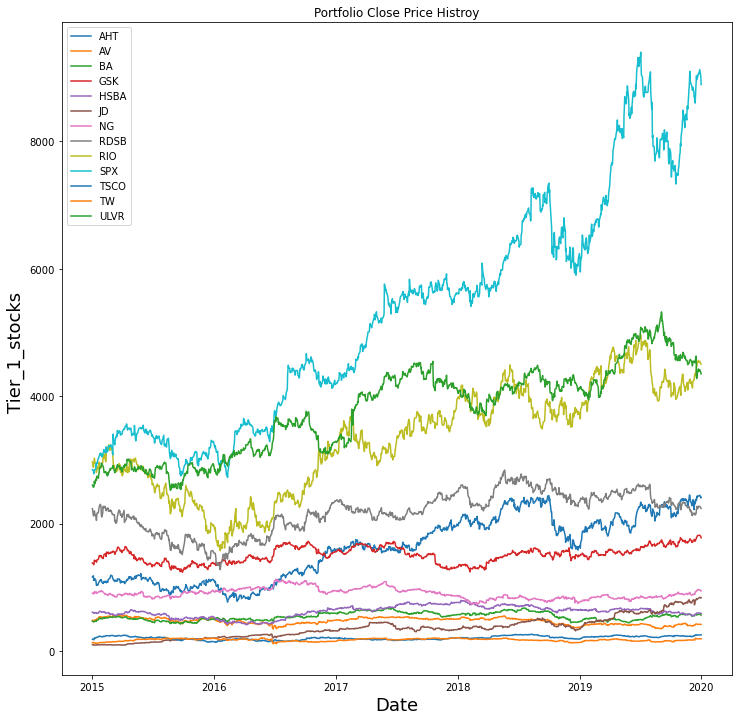

In [15]:
# visually show portfolio
title = 'Portfolio Close Price Histroy'

# get the stocks
my_stocks = prices

# create
plt.figure(figsize=(12,12))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stocks ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

#### 创建投资分配比例的权数

In [16]:
weight = 1/len(stocks)
weights = np.full(shape=len(stocks), fill_value=weight, dtype=np.float)
weights

array([0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.07692308, 0.07692308])

#### Five years total return

In [17]:
first = prices.head(1) # prices at the beginning of the investment
end = prices.tail(1) # prices at the end of the investment

In [18]:
five_yrs = pd.concat([first,end])
five_yrs

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-01-02,1165.0,484.39999,469.20001,1383.0,612.00000,101.60000,908.29999,2235.5,2970.0,2848.0,188.0,134.89999,2606.0
2019-12-31,2414.0,418.70001,564.79999,1779.0,591.90002,837.40002,944.29999,2239.5,4503.0,8890.0,255.2,193.39999,4350.5


In [19]:
rtn_pct = five_yrs.pct_change()
rtn_pct.iloc[1].mean()

0.9827255220602714

#### Portfolio daily return and cumulative return

In [20]:
return_stocks = prices.pct_change()
daily_returns_portfolio_mean = return_stocks.mean()
allocated_daily_returns = weights * daily_returns_portfolio_mean

In [21]:
portfolio_return = np.sum(allocated_daily_returns)
portfolio_return

0.00048332991761167475

In [22]:
return_stocks['portfolio_daily_returns'] = return_stocks.dot(weights)
return_stocks.head

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR,portfolio_daily_returns
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.014592,-0.028076,-0.015345,-0.009761,-0.013235,-0.001969,0.001541,-0.047864,-0.029125,-0.005618,-0.034042,-0.008154,-0.012663,-0.014594
2015-01-06,-0.061760,-0.014443,-0.011472,-0.009127,-0.016890,-0.069034,-0.014181,-0.003524,0.021155,-0.016949,-0.015419,-0.020179,0.000389,-0.017803
2015-01-07,0.000000,-0.001509,0.013138,0.016212,0.012296,0.008051,0.023082,0.012966,0.006113,0.005747,0.017897,0.009916,0.006605,0.010039
2015-01-08,0.019838,0.042953,0.013400,0.035170,0.008652,0.019336,0.016240,0.023970,0.021941,0.017500,0.149725,0.003021,0.029718,0.030882
2015-01-09,0.007073,0.014901,-0.002559,-0.012609,-0.006928,-0.016289,-0.010618,-0.018182,-0.014038,-0.002457,-0.024612,-0.053464,-0.015742,-0.011963
2015-01-12,-0.019315,-0.012847,0.005345,0.002128,0.001163,-0.011738,-0.002060,-0.015509,-0.020268,0.004574,0.002205,-0.011933,0.019802,-0.004496
2015-01-13,-0.029543,0.013840,0.010421,0.007434,0.002489,-0.003181,0.011297,0.000235,-0.001539,0.030823,0.036421,0.027375,0.009335,0.008877
2015-01-14,-0.047048,0.001222,-0.013681,-0.019325,-0.023337,0.000000,-0.027927,-0.035261,-0.039555,-0.014611,0.009434,-0.014107,-0.008879,-0.017929
2015-01-15,-0.002904,0.031746,0.023474,0.012540,0.011524,0.012979,0.006519,0.037524,0.013550,0.018621,0.024533,-0.013514,0.019784,0.015106


In [23]:
cumulative_returns_daily = (1+ return_stocks).cumprod()

#### cumulative daily return

In [24]:
cumulative_returns_daily.tail(3)

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR,portfolio_daily_returns
2019-12-27,2.099571,0.871594,1.235294,1.315112,0.976797,8.309055,1.058351,1.015880,1.531481,3.204003,1.361702,1.441438,1.694551,1.771981
2019-12-30,2.064378,0.867465,1.208014,1.300072,0.974346,8.190945,1.049763,1.005368,1.517508,3.167135,1.359043,1.438102,1.678051,1.754964
2019-12-31,2.072103,0.864368,1.203751,1.286334,0.967157,8.242126,1.039634,1.001789,1.516162,3.121489,1.357447,1.433655,1.669417,1.747813


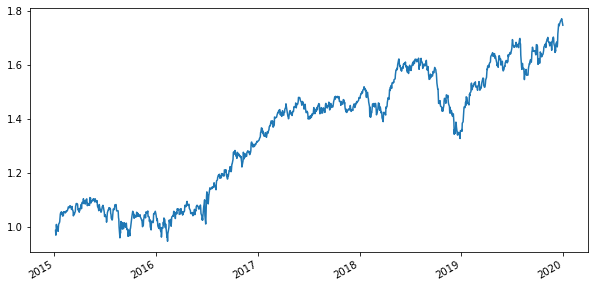

In [25]:
cumulative_returns_daily['portfolio_daily_returns'].plot(figsize=(10,5));

#### 平均到每一年

In [26]:
cumulative_returns_daily['portfolio_daily_returns'][-1]/5

0.34956252816581446

#### 使用完整个的stock price data, 计算每天价格百分比变动，每天协方差，每年协方差

In [27]:
prices_pct = prices.pct_change()
cov_matrix_day = prices_pct.cov()
cov_matrix_yrs = cov_matrix_day * 250

In [28]:
cov_matrix_yrs.head(2)

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.090983,0.031232,0.025076,0.016355,0.026507,0.022382,0.006531,0.026735,0.038574,0.030122,0.018020,0.02962,0.011620
AV,0.031232,0.056272,0.019670,0.011413,0.025561,0.025015,0.008004,0.021064,0.026811,0.019942,0.026479,0.04103,0.009879


#### 计算portfolio variance 和 standard deviation

In [29]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_yrs, weights))
port_variance

0.020575609703321666

In [30]:
print(str(np.round(port_variance, 3)*100) + '%')

2.1%


In [31]:
port_stddev = np.sqrt(port_variance)
port_stddev

0.14344200815424213

In [32]:
print(str(np.round(port_stddev, 3 )*100) + '%')

14.299999999999999%


In [33]:
rtn_5yrs_total = pd.DataFrame((np.array(prices.tail(1))-np.array(prices.head(1)))/np.array(prices.head(1)), columns=stocks )
rtn_5yrs_total

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
0,1.072103,-0.135632,0.203751,0.286334,-0.032843,7.242126,0.039634,0.001789,0.516162,2.121489,0.357447,0.433655,0.669417


In [34]:
rtn_5yrs_total.T.sum()

0    12.775432
dtype: float64

In [35]:
rtn_5yrs_total.T.mean()

0    0.982726
dtype: float64

In [36]:
rtn_5yrs_total.T.mean()/5

0    0.196545
dtype: float64